<a href="https://colab.research.google.com/github/GaganiKulathilaka/Customer-Subscription-Prediction/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Exploratory Data Analysis**

Import the necessary libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the dataset

In [ ]:
# Load data
train_data = pd.read_csv("/content/drive/MyDrive/bank-additional-full.csv", delimiter=';')

Display the data types of each column

In [ ]:
print("Data Types of Each Column:")
print(train_data.dtypes)

Data Types of Each Column:
age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object


The columns with the data type 'object' are the categorical data while the columns with the data type 'int64' and 'float64' are the numberical data.

Check for null values

In [ ]:
print(train_data.isnull().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


According to the above output the dataset does not consist of any null values.

**Handling missing values**

1. Calculating the overall 'yes' rate of the target variable using a pie chart

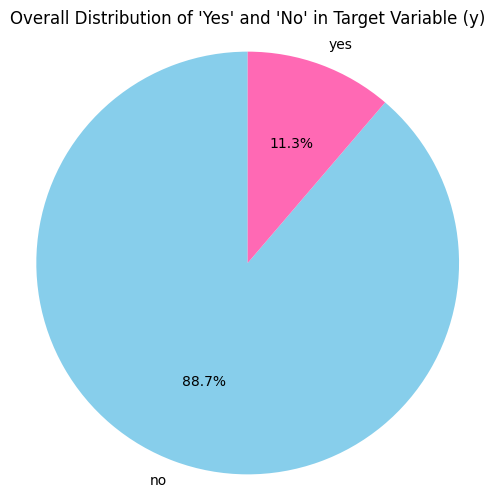

In [ ]:
# Calculate the distribution of 'yes' and 'no' in the target variable
y_distribution = train_data['y'].value_counts(normalize=True)

# Plot a pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    y_distribution,
    labels=y_distribution.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['skyblue', '#FF69B4']
)
plt.title("Overall Distribution of 'Yes' and 'No' in Target Variable (y)")
plt.axis('equal')  # Ensures the pie is drawn as a circle
plt.show()

2. Identifying columns with data with the value 'unknown'.

In [ ]:
# Identify columns with 'unknown' values
unknown_counts = train_data.isin(["unknown"]).sum()
unknown_columns = unknown_counts[unknown_counts > 0].index

# Analyze and print the impact of "unknown" on `y` for each column
for column in unknown_columns:
    # Filter rows with "unknown" in the current column
    unknown_data = train_data[train_data[column] == "unknown"]

    # Get the distribution of `y` in the filtered data
    y_distribution = unknown_data['y'].value_counts(normalize=True) * 100  # Convert to percentages

    # Print the percentages
    print(f"\nImpact of 'unknown' in column '{column}' on 'y':: {y_distribution.get('yes', 0):.1f}%")



Impact of 'unknown' in column 'job' on 'y':: 11.2%

Impact of 'unknown' in column 'marital' on 'y':: 15.0%

Impact of 'unknown' in column 'education' on 'y':: 14.5%

Impact of 'unknown' in column 'default' on 'y':: 5.2%

Impact of 'unknown' in column 'housing' on 'y':: 10.8%

Impact of 'unknown' in column 'loan' on 'y':: 10.8%


In [ ]:
# Impute columns with the mode
columns_to_impute = ['job', 'housing', 'loan']
for column in columns_to_impute:
    mode = train_data[column].mode()[0]
    train_data[column] = train_data[column].replace('unknown', mode)

# Drop columns with minimal impact
columns_to_drop = ['marital', 'education', 'default']
train_data = train_data.drop(columns=columns_to_drop)

# Verify the updated dataset
print("Remaining columns after imputation and deletion:", train_data.columns)
print("Unknown counts:\n", train_data.isin(['unknown']).sum())


Remaining columns after imputation and deletion: Index(['age', 'job', 'housing', 'loan', 'contact', 'month', 'day_of_week',
       'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')
Unknown counts:
 age               0
job               0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


Printing the preprocessed dataset

In [ ]:
df = train_data
df

,age,job,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


**Graphical Representations**

*Age Distribution and Subscription*

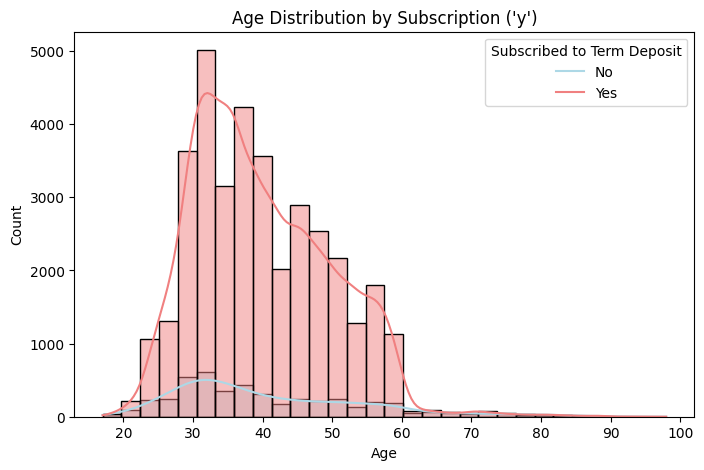

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(data=train_data, x='age', hue='y', kde=True, palette=['lightcoral', 'lightblue'], bins=30)
plt.title("Age Distribution by Subscription ('y')")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(title="Subscribed to Term Deposit", labels=['No', 'Yes'])
plt.show()

*Relationship between 'job' and Subscription*

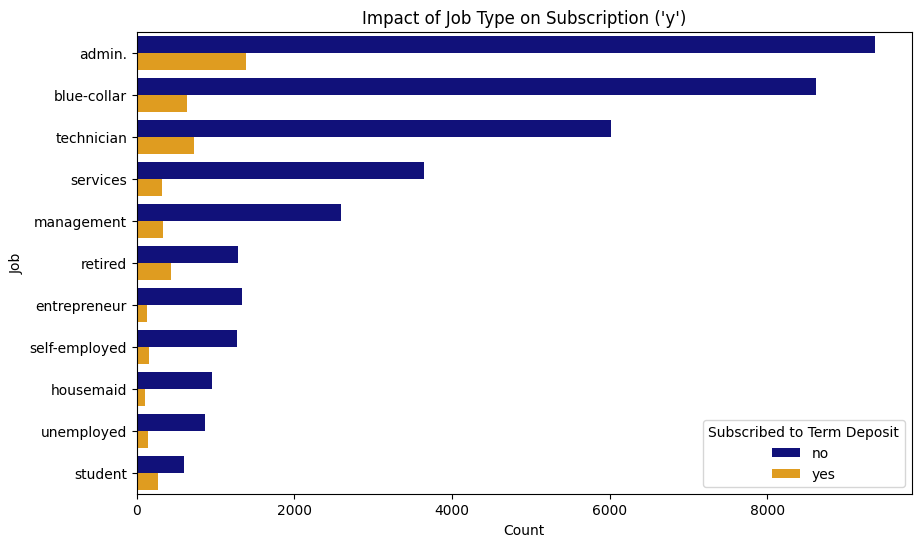

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(y='job', hue='y', data=train_data, palette=['#00008B', '#FFA500'], order=train_data['job'].value_counts().index)
plt.title("Impact of Job Type on Subscription ('y')")
plt.xlabel("Count")
plt.ylabel("Job")
plt.legend(title="Subscribed to Term Deposit")
plt.show()

*Monthly Trends (month) of Subscription*

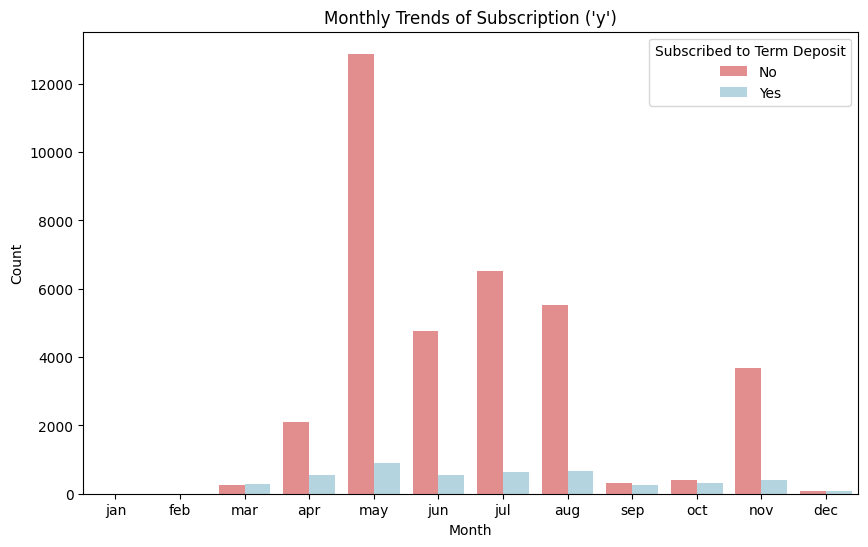

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='month', hue='y', palette=['lightcoral', 'lightblue'], order=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
plt.title("Monthly Trends of Subscription ('y')")
plt.xlabel("Month")
plt.ylabel("Count")
plt.legend(title="Subscribed to Term Deposit", labels=['No', 'Yes'])
plt.show()


*Impact of Contact Type (contact) on Subscription*

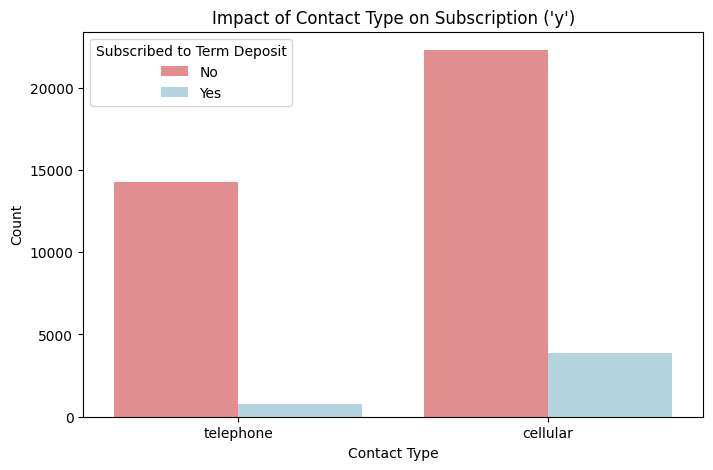

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=train_data, x='contact', hue='y', palette=['lightcoral', 'lightblue'])
plt.title("Impact of Contact Type on Subscription ('y')")
plt.xlabel("Contact Type")
plt.ylabel("Count")
plt.legend(title="Subscribed to Term Deposit", labels=['No', 'Yes'])
plt.show()


**Overall Summary of the dataset**



1.   Columns with less significant effect on the target variable such as 'marital', 'education' and 'default' was removed to prevent the model from overfitting to irrelevant data.

2.   There is a strong imbalance in the dataset with the majority of clients not subscribing to the term deposit.

3. In expectation of more data on the dataset and potential correlations between attributes, a few more bar plots were created.
